# CAR PRICE PREDICTION WITH MACHINE LEARNING

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. We shall learn how to train a car price prediction model in this project.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset=pd.read_csv("car data.csv")
dataset.drop(dataset.columns[[8]],axis=1,inplace=True)
np.random.seed(55)
dataset.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual


In [27]:
encoded_dataset = pd.get_dummies(data = dataset, columns = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'])
encoded_dataset

,Year,Selling_Price,Present_Price,Driven_kms,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
298,2009,3.35,11.00,87934,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
299,2017,11.50,12.50,9000,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [28]:
x=encoded_dataset.iloc[:, encoded_dataset.columns!='Selling_Price']
print(x)

     Year  Present_Price  Driven_kms  Car_Name_800  Car_Name_Activa 3g  \
0    2014           5.59       27000             0                   0   
1    2013           9.54       43000             0                   0   
2    2017           9.85        6900             0                   0   
3    2011           4.15        5200             0                   0   
4    2014           6.87       42450             0                   0   
..    ...            ...         ...           ...                 ...   
296  2016          11.60       33988             0                   0   
297  2015           5.90       60000             0                   0   
298  2009          11.00       87934             0                   0   
299  2017          12.50        9000             0                   0   
300  2016           5.90        5464             0                   0   

     Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  Car_Name_Bajaj Avenger 150  \
0                     0         

In [29]:
y=encoded_dataset.iloc[:,1]
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [31]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [32]:
y_pred = linreg.predict(x_test)

In [33]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(y_test, y_pred), 3)

model_rmse['Multi Linear Regression'] = rmse
model_r2['Multi Linear Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 3.116
R-squared value of the model is : 0.647


Text(0, 0.5, 'Predicted Selling Price')

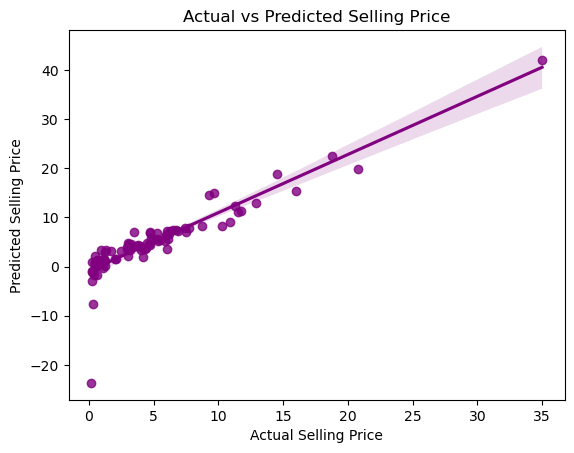

In [34]:
sns.regplot(x=y_test, y=y_pred, color="purple",marker="o",label="best_fit_line")
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')

#### Prakriti Mukherjee